<a href="https://colab.research.google.com/github/jx-dohwan/Aiffel_EGLMS_Project/blob/main/%EA%B0%84%EB%8B%A8%ED%95%9C_%EB%89%B4%EC%8A%A4_%EC%9A%94%EC%95%BD_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %cd /content/drive/MyDrive/인공지능/아이펠톤/PoC/data/train
# ! unzip /content/drive/MyDrive/인공지능/아이펠톤/PoC/data/train/TL1.zip

# %cd /content/drive/MyDrive/인공지능/아이펠톤/PoC/data/val
# ! unzip /content/drive/MyDrive/인공지능/아이펠톤/PoC/data/val/VL1.zip

참조 : https://wikidocs.net/72820

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-10-25 02:19:59--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-10-25 02:20:00--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc23f28a9e8ff1adc7804f799c4e.dl.dropboxusercontent.com/cd/0/get/Bvfdr-mOOOfFRbAxz_npUv8aTY8hM4THQkv-75K_y4_PRoAjxMQa03k3yKIuN0utTcjhwfAWmB4UhdTq_DNkKay_ZblyAWDdnPipMSZJteyCdMyLNsHUNDHqphYU5oFzraiGTrON0PK27VcXNo2uJgnEBZhLW6Ofj-lKt2TIfNHgovCEIR5jxs8EgwPGnQst4vo/file?dl=1# [following]
--2022-10-25 02:20:00--  https://uc23f28a9e8ff1adc7804f799c4e.dl.dropboxusercontent.com/cd/0/get/Bvfdr-mOO

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from konlpy.tag import Mecab
from collections import Counter
import re
import os
import random
import math
import urllib.request
import gensim
from gensim.models.keyedvectors import Word2VecKeyedVectors
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

mecab = Mecab()

In [ ]:
import glob
import json
import os

File_List = glob.glob('/content/drive/MyDrive/인공지능/아이펠톤/PoC/data/val/01.news_r/20per/*.json')

val_summary = []
val_passage = []
for i in File_List:
    f = open(i,'r')
    js = json.loads(f.read())
    # file_list.append(js)
    #print("id : %s" % (js['Annotation']['summary1']))#['Meta(Refine)']['passage']
    val_summary.append(js['Annotation']['summary1'])
    val_passage.append(js['Meta(Refine)']['passage'])
    f.close()

In [ ]:
File_List = glob.glob('/content/drive/MyDrive/인공지능/아이펠톤/PoC/data/train/01.news_r/20per/*.json')

train_summary = []
train_passage = []
for i in File_List:
    f = open(i,'r')
    js = json.loads(f.read())
    # file_list.append(js)
    #print("id : %s" % (js['Annotation']['summary1']))#['Meta(Refine)']['passage']
    train_summary.append(js['Annotation']['summary1'])
    train_passage.append(js['Meta(Refine)']['passage'])
    f.close()

In [ ]:
print('전체 샘플 수 :', len(val_summary))
print('전체 샘플 수 :', len(val_passage))
print()
print('전체 샘플 수 :', len(train_summary))
print('전체 샘플 수 :', len(train_passage))

전체 샘플 수 : 1350
전체 샘플 수 : 1350

전체 샘플 수 : 10800
전체 샘플 수 : 10800


In [ ]:
print(val_summary[100])
print()
print(val_passage[100])
print()
print(train_summary[100])
print()
print(train_passage[100])

정반대 대외정책을 가진 트럼프 대통령과 바이든 전 부통령이 대선 후보로 확정되며 미국 대선이 시작됐는데 국내 전문가는 한국 정부에겐 바이든, 트럼프 모두 숙제라고 했다.

도널드 트럼프 대통령과 조 바이든 전 부통령이 전당대회를 통해 각각 공화당과 민주당의 대선 후보로 공식 확정되면서 오는 11월 3일을 향한 미국 대선 레이스의 막이 올랐다.
  트럼프와 바이든의 대외정책 외양은 극과 극이다.
  트럼프 캠프는 공식 홈페이지에서 해외 주둔 미군을 복귀시키고, 동맹국들로부터 방위비를 더 받아내며 중국에 빼앗긴 일자리를 되찾아오겠다고 선언했다.
  민주당은 92쪽 분량의 대선 정강·정책에서 미국의 동맹 회복과 다자주의 체제 복원을 약속했다.
  한반도 문제를 놓곤 “북한 인권 문제를 제기하는 동시에 장기적인 관점에서 외교 캠페인을 펴겠다”고 언급했다.
  중앙일보는 29일 국내 외교·안보 전문가 5명에게 차기 미국 정부의 외교안보 정책 전망과 한국 정부의 과제를 물었다.
  트럼프건 바이든이건 모두 한국엔 숙제라는 답이 돌아왔다.
   바이든·김정은 만남은 기대 못해 미·중 경쟁 속 누가 더 한국을 압박할까.
 ▶전재성 서울대 정치외교학부 교수=트럼프는 중국 체제와 주권을 공격하는 신냉전론자인 반면, 바이든은 인권 문제 등 특정 행동을 문제삼는다는 데 결정적인 차이가 있다.
  바이든은 미국 중심의 세계 질서를 설정한 후 다자 협력체제로 중국을 포위할 거다.
 ▶김성한 고려대 국제대학원장=‘한국은 누구 편인가’라는 노골적인 말은 당연히 트럼프가 할 것이다.
  반면에 바이든 정부는 말은 부드러워도 조직적으로 압박해 올 것이라 미국 중심 질서에 한국을 편입하는가 마는가가 문제 될 것이다.
  따라서 압박 강도엔 차이가 없다.
  트럼프 재선 땐 주한미군 감축이 빨라지리라는 우려가 있다.
 ▶천영우 전 청와대 외교안보수석=트럼프는 한·미동맹에 대한 이해가 없고 이해하려고도 하지 않는다.
  충분히 가능하다.
 ▶전재성=트럼프건 바이든이건 미국이 동아시아 전략을 수정하

원본의 최소 길이 : 136
원본의 최대 길이 : 329
원본의 평균 길이 : 271.1024074074074
요약의 최소 길이 : 6
요약의 최대 길이 : 29
요약의 평균 길이 : 19.133518518518517


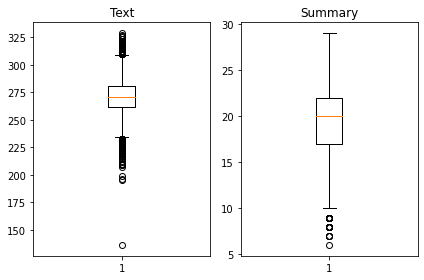

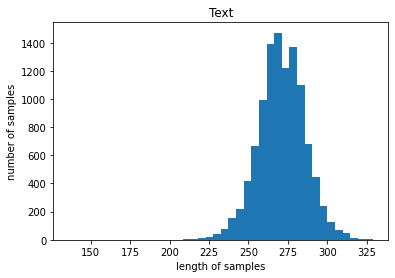

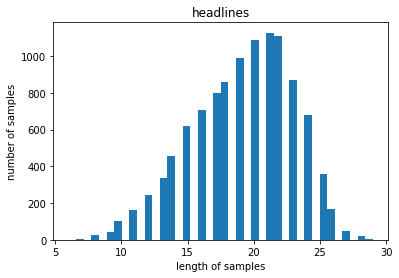

In [ ]:
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in train_passage]
headlines_len = [len(s.split()) for s in train_summary]

print('원본의 최소 길이 : {}'.format(np.min(text_len)))
print('원본의 최대 길이 : {}'.format(np.max(text_len)))
print('원본의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [ ]:
text_max_len = 300
summary_max_len  = 26

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(str(s).split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [ ]:
below_threshold_len(text_max_len, train_passage)
below_threshold_len(headlines_max_len,  train_summary)

전체 샘플 중 길이가 300 이하인 샘플의 비율: 0.9748148148148148
전체 샘플 중 길이가 26 이하인 샘플의 비율: 0.9934259259259259


In [ ]:
assert len(train_passage) == len(train_summary)

cleaned_corpus = list(set(zip(train_passage, train_summary)))

In [ ]:
for pair in cleaned_corpus[:10]:
    print(pair)
    print('pair 0 :',pair[0])
    print('pair 1 :',pair[1])
    print(len(pair[0]))

('신종 코로나바이러스가 휴대전화 화면, 지폐, 스테인리스 스틸과 같은 표면에서 28일 동안 생존할 수 있다는 연구 결과가 나왔다.\n  이번 연구는 코로나바이러스가 알려진 것보다 물체 표면에서 오래 살아남을 수 있다는 점을 시사한다.\n  11일(현지시간) BBC 등 외신에 따르면 호주연방과학산업연구기구(CSIRO)는 섭씨 20도 환경인 어두운 실내에서 연구를 진행해 그 결과를 바이러스학 저널(Virology Journal)에 발표했다.\n    독감 바이러스보다 11일 더 오래 살아남아 연구에 따르면 휴대전화 스크린, 플라스틱과 같은 매끄러운 표면과 지폐에서 코로나바이러스가 28일 동안 생존해 있었다.\n  BBC는 이번 연구에서 코로나바이러스는 \'극도로 튼튼한(extremely robust)\' 모습을 보였다고 전했다.\n  반면 같은 조건에서 독감 바이러스는 17일 동안 생존했다.\n  코로나바이러스가 11일이나 더 오래 살아남은 것이다.\n     이전의 선행 연구에서 코로나바이러스는 지폐나 유리 표면에서 2~3일, 플라스틱이나 스테인리스 스틸의 표면에선 6일 동안 생존할 수 있는 것으로 나타났다.\n   연구진은 기온과 코로나바이러스의 상관관계도 알아봤다.\n  그 결과 기온이 높아질수록 코로나바이러스의 감염력이 감소했다.\n  섭씨 40도 환경에서는 24시간 이내에 바이러스의 감염성이 사라진 것으로 나타났다.\n  또 천 같은 통기성 소재보다 바람이 통하지 않고 부드러운 소재에서 코로나바이러스가 더 오래 남아 있었다.\n     래리 마셸 CSIRO 박사는 "코로나바이러스가 표면에서 얼마나 오래 생존할 수 있는지 확인함으로써 바이러스의 확산을 더욱 정확하게 예측하고 확산을 방지할 수 있다"고 말했다.\n    마스크 표면 7일, 돼지 피부 14일 … 냉동식품 포장지서도 발견   연구진은 또 이번 연구는 저온의 육류 가공·저장 시설에서 왜 코로나바이러스가 확산하는지 이유를 설명할 수 있다고 했다.\n  낮은 온도, 스테인리스 스틸 표면에서 코로나바

In [ ]:
def preprocess_sentence(sentence):
  sentence = sentence.lower()
  sentence = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z?.!,]+", " ", sentence)
  sentence = sentence.strip()
  sentence = mecab.morphs(sentence)
  #print(sentence)

  return sentence

In [ ]:
def build_corpus(cleaned_corpus):
  train_passage_corpus = []
  train_summary_corpus = []
  for pair in cleaned_corpus:#[:num_examples]:
    passage = preprocess_sentence(pair[0])
    summary = preprocess_sentence(pair[1])
 
    train_passage_corpus.append(passage)
    train_summary_corpus.append(summary)

  return train_passage_corpus, train_summary_corpus

In [ ]:
train_passage_corpus, train_summary_corpus = build_corpus(cleaned_corpus)

In [ ]:
print(train_passage_corpus[100])

['조', '바이든', '미국', '민주당', '대통령', '후보', '가', '오', '는', '11', '월', '대선', '에서', '함께', '뛸', '부통령', '후보', '를', '이번', '주', '에', '지명', '할', '것', '으로', '예상', '된다', '.', '당초', '바이든', '후보', '는', '지난', '1', '일', '러닝메이트', '를', '발표', '하', '기', '로', '했', '다가', '첫째', '주', '후반', '으로', '미뤘', '고', ',', '이', '를', '또', '연기', '했', '다', '.', '고심', '을', '거듭', '하', '고', '있', '는', '것', '이', '다', '.', '부통령', '후보', '지명', '은', '바이든', '이', '선거', '운동', '을', '시작', '한', '이후', '내리', '는', '가장', '중요', '한', '결정', '으로', '꼽힌다', '.', '바이든', '이', '어떤', '결정', '을', '내리', '는지', '가', '이번', '대선', '의', '향방', '에', '도', '영향', '을', '줄', '것', '이', '란', '예상', '에서', '다', '.', '미국', '언론', '도', '유력', '후보', '순위', '를', '매겨', '가', '면서', '상황', '을', '중계', '하', '고', '있', '다', '.', 'cnn', '은', '9', '일', '현지', '시간', '카말라', '해리스', '상원', '의원', '을', '1', '순위', ',', '수전', '라이스', '전', '백악관', '국가', '안보', '보좌관', '을', '2', '순위', '에', '올렸', '다', '.', '3', '위', '는', '그레첸', '휘트', '머', '미', '시간', '주지사', ',', '4', '위', '태미', '덕', '워스', '상원', '의원', ',', '5', '

In [ ]:
print(train_passage_corpus[100])
print(train_summary_corpus[100])

print(len(train_passage_corpus))
print(len(train_summary_corpus))

['조', '바이든', '미국', '민주당', '대통령', '후보', '가', '오', '는', '11', '월', '대선', '에서', '함께', '뛸', '부통령', '후보', '를', '이번', '주', '에', '지명', '할', '것', '으로', '예상', '된다', '.', '당초', '바이든', '후보', '는', '지난', '1', '일', '러닝메이트', '를', '발표', '하', '기', '로', '했', '다가', '첫째', '주', '후반', '으로', '미뤘', '고', ',', '이', '를', '또', '연기', '했', '다', '.', '고심', '을', '거듭', '하', '고', '있', '는', '것', '이', '다', '.', '부통령', '후보', '지명', '은', '바이든', '이', '선거', '운동', '을', '시작', '한', '이후', '내리', '는', '가장', '중요', '한', '결정', '으로', '꼽힌다', '.', '바이든', '이', '어떤', '결정', '을', '내리', '는지', '가', '이번', '대선', '의', '향방', '에', '도', '영향', '을', '줄', '것', '이', '란', '예상', '에서', '다', '.', '미국', '언론', '도', '유력', '후보', '순위', '를', '매겨', '가', '면서', '상황', '을', '중계', '하', '고', '있', '다', '.', 'cnn', '은', '9', '일', '현지', '시간', '카말라', '해리스', '상원', '의원', '을', '1', '순위', ',', '수전', '라이스', '전', '백악관', '국가', '안보', '보좌관', '을', '2', '순위', '에', '올렸', '다', '.', '3', '위', '는', '그레첸', '휘트', '머', '미', '시간', '주지사', ',', '4', '위', '태미', '덕', '워스', '상원', '의원', ',', '5', '

In [ ]:
word2vec_file_path_lstm = '/content/drive/MyDrive/인공지능/아이펠/GoingDeeper/제출용/data/ko.bin'
ko_model = gensim.models.Word2Vec.load(word2vec_file_path_lstm)
ko_model.most_similar('사과')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('사죄', 0.5442899465560913),
 ('충고', 0.4946415424346924),
 ('질문', 0.48838865756988525),
 ('해명', 0.48268449306488037),
 ('대답', 0.4778830409049988),
 ('선처', 0.4665257930755615),
 ('질타', 0.4546084403991699),
 ('발언', 0.4542806148529053),
 ('회답', 0.45340797305107117),
 ('고소', 0.45193421840667725)]

In [ ]:
def lexical_sub(sentence, word2vec):
    res = ""
    toks = sentence

    try:
        _from = random.choice(toks)
        _to = word2vec.most_similar(_from)[0][0]
        
    except:   # 단어장에 없는 단어
        return None

    for tok in toks:
        if tok is _from: res += _to + " "
        else: res += tok + " "

    return res

In [ ]:
print(str(train_passage_corpus[100]))
test = lexical_sub(train_passage_corpus[100], ko_model)
print(type(test))
print(test.split())

['조', '바이든', '미국', '민주당', '대통령', '후보', '가', '오', '는', '11', '월', '대선', '에서', '함께', '뛸', '부통령', '후보', '를', '이번', '주', '에', '지명', '할', '것', '으로', '예상', '된다', '.', '당초', '바이든', '후보', '는', '지난', '1', '일', '러닝메이트', '를', '발표', '하', '기', '로', '했', '다가', '첫째', '주', '후반', '으로', '미뤘', '고', ',', '이', '를', '또', '연기', '했', '다', '.', '고심', '을', '거듭', '하', '고', '있', '는', '것', '이', '다', '.', '부통령', '후보', '지명', '은', '바이든', '이', '선거', '운동', '을', '시작', '한', '이후', '내리', '는', '가장', '중요', '한', '결정', '으로', '꼽힌다', '.', '바이든', '이', '어떤', '결정', '을', '내리', '는지', '가', '이번', '대선', '의', '향방', '에', '도', '영향', '을', '줄', '것', '이', '란', '예상', '에서', '다', '.', '미국', '언론', '도', '유력', '후보', '순위', '를', '매겨', '가', '면서', '상황', '을', '중계', '하', '고', '있', '다', '.', 'cnn', '은', '9', '일', '현지', '시간', '카말라', '해리스', '상원', '의원', '을', '1', '순위', ',', '수전', '라이스', '전', '백악관', '국가', '안보', '보좌관', '을', '2', '순위', '에', '올렸', '다', '.', '3', '위', '는', '그레첸', '휘트', '머', '미', '시간', '주지사', ',', '4', '위', '태미', '덕', '워스', '상원', '의원', ',', '5', '

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [ ]:
def Augmentation_model(train_passage_corpus , train_summary_corpus, ko_model):
    new_train_passage_corpus = []
    new_train_summary_corpus = []

    for i in tqdm(range(len(train_passage_corpus))):
        new_que = lexical_sub(train_passage_corpus[i], ko_model)
        new_ans = lexical_sub(train_summary_corpus[i], ko_model)

        if new_que is not None: 
            new_train_passage_corpus.append(new_que.split())
            new_train_summary_corpus.append(train_summary_corpus[i])
        
        if new_ans is not None:
            new_train_passage_corpus.append(new_ans.split())
            new_train_summary_corpus.append(train_passage_corpus[i])
          
    print(new_train_passage_corpus[:100])
    print(new_train_summary_corpus[:100])

    return new_train_passage_corpus, new_train_summary_corpus

In [ ]:
new_train_passage_corpus, new_train_summary_corpus = Augmentation_model(train_passage_corpus , train_summary_corpus, ko_model)

  0%|          | 0/10800 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


[['신종', '코로나', '바이러스', '가', '휴대', '전화', '화면', ',', '지폐', ',', '스테인리스', '스틸', '과', '같', '은', '표면', '에서', '28', '일', '동안', '생존', '할', '수', '있', '다는', '연구', '결과', '가', '나왔', '다', '.', '이번', '연구', '는', '코로나', '바이러스', '가', '알려진', '것', '보다', '물체', '표면', '에서', '오래', '살아남', '을', '수', '있', '다는', '점', '을', '시사', '한다', '.', '11', '일', '현지', '시간', 'bbc', '등', '외신', '에', '따르', '면', '호주', '연방', '과학', '산업', '연구', '기구', 'csiro', '는', '섭씨', '20', '도', '환경', '인', '어두운', '실내', '에서', '연구', '를', '진행', '해', '그', '결과', '를', '바이러스학', '저널', 'virology', 'journal', '에', '발표', '했', '다', '.', '독감', '바이러스', '보다', '11', '일', '더', '오래', '살아남', '아', '연구', '에', '따르', '면', '휴대', '전화', '스크린', ',', '플라스틱', '과', '같', '은', '매끄러운', '표면', '과', '지폐', '에서', '코로나', '바이러스', '가', '28', '일', '동안', '생존', '해', '있', '었', '다', '.', 'bbc', '는', '이번', '연구', '에서', '코로나', '바이러스', '는', '극도', '로', '튼튼', '한', 'extremely', 'robust', '모습', '을', '보였', '다고', '전했', '다', '.', '반면', '같', '은', '조건', '에서', '독감', '바이러스', '는', '17', '일', '동안', '생존', '했'

In [ ]:
print(len(new_train_passage_corpus))
print(len(new_train_summary_corpus))

18975
18975


In [ ]:
train_passage_corpus = train_passage_corpus + new_train_passage_corpus
train_summary_corpus = train_summary_corpus + new_train_summary_corpus

train_passage_corpus = train_passage_corpus + new_train_passage_corpus
train_summary_corpus = train_summary_corpus + new_train_summary_corpus

In [ ]:
print(len(train_passage_corpus))
print(len(train_summary_corpus))

48750
48750


In [ ]:

temp_corpus_input = []
temp_corpus_target = []

for sample_data in train_summary_corpus:
  temp_corpus_input.append(["sostoken"] + sample_data)
  temp_corpus_target.append(sample_data + ['eostoken'])

encoder_input = np.array(train_passage_corpus)
decoder_input = np.array(temp_corpus_input)
decoder_target = np.array(temp_corpus_target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when

In [ ]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[42829 44586 21149 ... 15666 10358 25529]


In [ ]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [ ]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 9750


In [ ]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 39000
훈련 레이블의 개수 : 39000
테스트 데이터의 개수 : 9750
테스트 레이블의 개수 : 9750


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer 
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 

In [ ]:
threshold = 6
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 76783
등장 빈도가 5번 이하인 희귀 단어의 수: 35249
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 41534
단어 집합에서 희귀 단어의 비율: 45.907297188179676
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7033947295996599


In [ ]:
src_vocab = 40000
src_tokenizer = Tokenizer(num_words=src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [ ]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[2486, 24, 3, 2487, 27, 5, 1221, 3354, 15, 243, 9, 2366, 7, 3562, 12, 57, 48, 490, 1, 10790, 9, 180, 1845, 5, 13135, 907, 34, 86, 377, 2262, 7669, 75, 10216, 138, 832, 5, 208, 1818, 1437, 2022, 3156, 3110, 2058, 29, 5097, 542, 48, 157, 128, 3, 308, 1235, 1031, 45, 53, 1900, 704, 434, 538, 1557, 190, 9, 2528, 3618, 6, 907, 11444, 10, 886, 14, 2, 1, 3156, 3, 1371, 1221, 15, 608, 17, 3354, 15, 2487, 5, 6933, 274, 8, 92, 35, 907, 11444, 7, 560, 266, 3, 2, 1, 10123, 24194, 5464, 2487, 3354, 304, 426, 4134, 907, 458, 2487, 7, 768, 230, 289, 6, 1141, 1195, 3577, 6, 136, 41, 2487, 9, 176, 786, 7, 53, 12, 19891, 4, 3460, 841, 171, 6, 164, 176, 12, 3, 10, 1160, 8, 252, 350, 583, 7, 4690, 10, 8, 30, 108, 18950, 8, 4, 454, 3, 55, 203, 16, 2, 1, 13136, 10, 1791, 8, 4, 162, 85, 29761, 22, 185, 2633, 8, 35, 4953, 37, 117, 4134, 1184, 3, 21491, 23, 3, 297, 1248, 7, 476, 19, 185, 2431, 751, 3, 2, 1, 179, 6, 136, 41, 584, 128, 27, 9, 82, 10044, 138, 283, 2435, 4968, 12, 239, 8, 4, 697, 22, 299, 1275, 2

In [ ]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [ ]:
threshold = 5
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 72807
등장 빈도가 4번 이하인 희귀 단어의 수: 35933
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 36874
단어 집합에서 희귀 단어의 비율: 49.3537709286195
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.8435012234742795


In [ ]:
tar_vocab = 30000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[53, 561, 124, 27, 9, 493, 31, 525, 4702, 6687, 14, 301, 404, 257, 6, 1544, 665, 5, 1289, 2718, 3361, 495, 10, 57, 11, 16, 71, 182, 3, 133, 2, 1], [53, 93, 449, 420, 279, 7, 7680, 3, 272, 127, 6, 19, 17902, 3893, 3, 2, 1, 11694, 664, 476, 18, 190, 420, 279, 6, 1570, 5, 938, 8, 4, 3, 24, 3, 25, 26, 43, 6011, 1, 277, 538, 127, 11694, 3, 7786, 8, 35, 891, 8, 11, 16, 2, 1, 93, 449, 279, 17, 538, 127, 532, 109, 3, 533, 109, 17, 14224, 42, 220, 2369, 546, 860, 8486, 3, 417, 315, 20, 528, 80, 1059, 2, 1, 49, 81, 55, 81, 52, 929, 7, 1333, 384, 4, 538, 127, 298, 723, 77, 51, 601, 12, 77, 81, 30, 52, 14, 4330, 10, 38, 32, 60, 35, 44, 62, 538, 127, 11694, 5, 464, 17, 74, 4, 174, 12, 244, 191, 4, 607, 3189, 26, 43, 239, 4, 16022, 12, 432, 1, 358, 23, 222, 59, 9145, 923, 154, 255, 449, 23, 30, 358, 165, 136, 29134, 39, 5, 231, 17, 15, 154, 14, 8309, 9580, 2349, 1758, 330, 18, 49, 1, 77, 775, 18, 158, 1859, 9, 342, 1, 138, 775, 2256, 2153, 1, 75, 10, 304, 13, 122, 14, 538, 127, 180, 41

In [ ]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 39000
훈련 레이블의 개수 : 39000
테스트 데이터의 개수 : 9750
테스트 레이블의 개수 : 9750


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [ ]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [ ]:
import urllib
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/20.%20Text%20Summarization%20with%20Attention/attention.py", filename="attention.py")
from attention import AttentionLayer

In [ ]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 128)     5120000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 300, 256),   394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

153/153 [==============================] - 602s 4s/step - loss: 6.3034 - val_loss: 5.7292


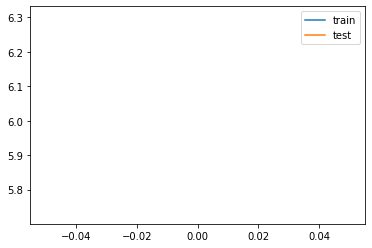

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [ ]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

In [ ]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    sentence=''
    for i in input_seq:
        if(i!=0):
            sentence = sentence + src_index_to_word[i]+' '
    return sentence

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    sentence=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            sentence = sentence + tar_index_to_word[i] + ' '
    return sentence

In [ ]:
for i in range(500, 1000):
    print("원문 : ",seq2text(encoder_input_test[i]))
    print("실제 요약문 :",seq2summary(decoder_input_test[i]))
    print("예측 요약문 :",decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  과 오 는 저 김형오 가 지 고 가 겠 다 고 밝혔 다 . 그러 면서 공천 결과 가 마음 에 들 지 않 고 다소 부족 하 더라도 문재인 정권 심판 이 라는 대의 를 위해 동참 해 줄 것 을 간곡히 호소 한다 고 부탁 했 다 . 김 위원장 은 이번 공천 심사 에서 시대 의 강 을 건너 는 것 과 대한민국 살리 기 두 가지 를 고려 했 다고 밝혔 다 . 그 는 전자 는 과거 에 대한 반성 과 혁신 을 , 후자 는 인 적 쇄신 과 문 정권 심판 을 의미 한다 며 거의 현역 의 절반 이 되 는 분 들 이 희생 한 덕분 에 시대 의 강 은 무사히 것 같 다 고 강조 했 다 . 시대 의 강 은 박근혜 전 대통령 탄핵 을 의미 한다 . 실제 친 박 친 박근혜 계 에서 지목 했 던 탄핵 5 적 , 비 박근혜 계 가 지목 했 던 친 박 10 적 등 에 해당 하 는 인사 들 은 모두 탈당 했 거나 불출마 컷오프 됐 다 . 김 위원장 은 구인난 도 토로 했 다 . 그 는 공천 의 핵심 은 사람 인데 인재 는 어느 날 갑자기 하늘 에서 떨어지 거나 땅 에서 솟 는 게 아니 다 라며 그 동안 우리 가 사람 를 기르 지 못한 대가 를 지금 치르 고 있 다 고 말 했 다 . 이어 인물 의 빈곤 이 라는 현실 앞 에서 우리 는 두 가지 방책 을 썼 다 며 하나 는 인물 의 전략 적 배치 , 다른 하나 는 미래 를 위한 묘목 심기 였 다 고 설명 했 다 . 당 대표 급 인사 와 중진 의원 들 의 험지 배치 , 과감 한 신인 등용 을 뜻 한다 . 
실제 요약문 : 열 고 불출마 를 결단 한 의원 들 에게 미안 한 마음 이 라면서 도 변하 지 않 으면 다 죽 는다고 호소 했 다 . 
1/1 [==============================] - 0s 19ms/step
예측 요약문 :  코로나 의 것 을 것 을 있 고 있 고 있 고 있 고 있 고 있 고 있 고 말 했 다 .


원문 :  핀트 앱 은 가입 회원 들 이 입력 한 설문 조사 를 바탕 으로 ai 머신 러닝 기술 아이